# Classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9).

In [49]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset from keras datasets

In [40]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Printing some train images from the dataset

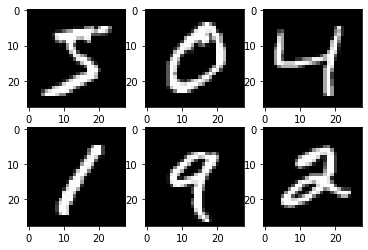

In [50]:
fig, ax = plt.subplots(2,3)
ax = ax.flatten()

for i in range(6):
    sample = i
    image = train_images[sample]
    ax[i].imshow(image, cmap='gray')

### Printing the train images shape along with labels

In [53]:
print(train_images.shape)
print(train_labels)

(60000, 28, 28)
[5 0 4 ... 5 6 8]


So we have 60000 images for training our model each with 28*28 pixel value.

### Printing the test images shape along with labels

In [54]:
print(test_images.shape)
print(test_labels)

(10000, 28, 28)
[7 2 1 ... 4 5 6]


And we have 10000 images for testing our model.

### Now Reshaping and changing its type of our train and test images so it lies in the range 0 to 1.

In [58]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### Converting the labels into categories so our model can work properly

In [61]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Now building the neural network 

Adding a dense layer with activation function as Relu and then another Dense layer with softmax function to classify different labels 

In [22]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

### Now compling with the optimizer rmsprop and loss function as categorical crossentropy

In [62]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

### Now training the model

In [63]:
 network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0298 - accuracy: 0.9910
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0222 - accuracy: 0.9937
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0167 - accuracy: 0.9954
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0126 - accuracy: 0.9967
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0094 - accuracy: 0.9981


In [64]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0629 - accuracy: 0.9826


In [65]:
 print('test_acc:', test_acc)

test_acc: 0.9825999736785889


So we get an accuracy of 99.81 in the training model and 98.25 in the testing accuracy score.So, this means that our model is overfitting in the training phase. 